In [1]:
print("Hello world!")

Hello world!


In [2]:
import numpy as np
from numpy import linalg as LA
import random
import math

Numpy is a library which you will use a lot during your Python practice.

In [3]:
a=np.array(range(2,8,3))
a

array([2, 5])

In [4]:
a.shape

(2,)

In [5]:
a=a.reshape(-1,1)
a

array([[2],
       [5]])

In [6]:
a.shape

(2, 1)

In [7]:
a.T

array([[2, 5]])

In [8]:
a.T.shape

(1, 2)

In [9]:
a.T*a

array([[ 4, 10],
       [10, 25]])

In [10]:
(a.T @ a) ** 0.5

array([[5.38516481]])

In [11]:
np.linalg.norm(a)

5.385164807134504

**Vectors using numpy**

Create vectors of a given shape (5,1) using [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) and [np.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)


In [12]:
shape = (5,1)

In [13]:
#ones
vectors = np.ones(shape)
vectors

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [14]:
#zeros
vectors = np.zeros(shape)
vectors

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [15]:
#random
vectors = np.random.rand(*shape)
vectors

array([[0.13721254],
       [0.85876092],
       [0.73286824],
       [0.26616312],
       [0.88127762]])

**Represantation space with data vectors** (slides 8-9)

The D-dimensional space is divided into equivalent bins.
Show that the probability to have a not empty bin decreases while dimensionality rises. 

In [16]:
b = 10 #bins
n = 5 #samples per bin we want
D = 3 #representation space dimensionality

# To find out L, refer to the lectures
L =  n * (b ** D) #number of samples we need to genenrate to have n samples per bin
assert isinstance(L, (int, float)), "L should be a scalar"
L

5000

In [17]:
shape=(L, D)

Generate X as random matrix of a given shape

In [18]:
X = np.random.random(shape)
X[:6]

array([[0.86620299, 0.18528763, 0.42262668],
       [0.26752857, 0.61267807, 0.90518495],
       [0.32532794, 0.00745448, 0.69109581],
       [0.50645012, 0.94579188, 0.72111816],
       [0.32006293, 0.33757486, 0.82354805],
       [0.29281631, 0.26856325, 0.94501867]])

Using [np.histogramdd](https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html) make a D-dimensional histogram for bins=b. It should return an array of size (b, b, ..., b) where each element is equal to number of samples in the bin.

In [19]:
h, _ = np.histogramdd(X)

In [20]:
assert h.shape == (10, 10, 10)

In [21]:
h[0]

array([[ 5.,  2.,  4.,  4.,  3.,  7.,  3., 11.,  5.,  8.],
       [ 6.,  8.,  5.,  2.,  6.,  7.,  7.,  2.,  5.,  5.],
       [ 6.,  5.,  5.,  4.,  5.,  5.,  3.,  6.,  3.,  5.],
       [ 2.,  6.,  6.,  6.,  9.,  3.,  3.,  2., 10.,  3.],
       [ 5.,  3.,  7.,  6.,  7.,  3.,  6., 10.,  5.,  6.],
       [ 3.,  4.,  4.,  8.,  3.,  4.,  5.,  3.,  6.,  5.],
       [ 5.,  1.,  7.,  5.,  4.,  2.,  4.,  4.,  7.,  2.],
       [ 6.,  8.,  6.,  4.,  3.,  2.,  4.,  3.,  1.,  4.],
       [ 8.,  5.,  5., 10.,  5.,  3.,  4.,  2.,  4.,  8.],
       [ 4.,  6.,  6.,  7.,  5.,  7.,  4.,  4., 12.,  3.]])

In [22]:
D_range = range(1,8)
h_values = []
N = L
for D in D_range:
  shape=(N, D)
  X = np.random.random(shape)
  h, _ = np.histogramdd(X)
  h_mean = np.mean(h)
  p = h_mean/N
  h_values.append(h_mean)

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average sample in the bin')

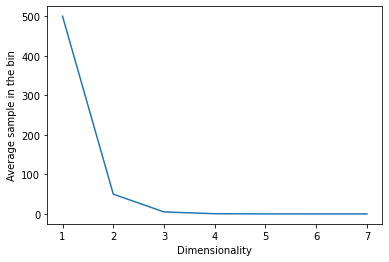

In [24]:
plt.plot(D_range, h_values)
plt.xlabel("Dimensionality")
plt.ylabel("Average sample in the bin")

**Hypersphere and hypercube** (slides 10-11)

Hypercube [-r, r] in D dimensional space. We draw N points uniformly from it. Show how many points will fall in the hypersphere which center is in the origin and radius is r.

Generate N uniform samples from hypercube [-r,r] in D-dimensional space using [np.random.uniform ](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

In [25]:
N = 100
D = 3
r = 0.3

In [26]:
cube_samples = np.random.uniform(-r,r,N)

Check yourself that samples are within given range

In [27]:
assert np.all(cube_samples >= -r) and np.all(cube_samples <= r)

What does this line do?
Verify that all the samples are in the hypercube.

Now how can you verify that a point lies in the sphere with a center in (0, 0) and radius r=0.5? 

*Hint: use [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)*

In [28]:
point=np.random.rand(2,)
r=0.5
point

array([0.90130533, 0.79272234])

In [29]:
#check if the point lies in the sphere with a center in (0, 0) and radius r=0.5? 
# Whether a point lies inside a sphere or not, depends upon its distance from the centre so we use it norm.
if abs(LA.norm(point)) < 0.5:
  print('The point is in the sphere.')
else:
  print("The point is not in the sphere.")

The point is not in the sphere.


What if we have N=100 points so the array of shape (100,2)? In this case we want to have an answer for each point separately.

*Hint: check the axis argument in the function you used for one point.*

In [30]:
points= np.random.random((100,2))
points[:5]

array([[0.27051358, 0.34797077],
       [0.48036682, 0.50968167],
       [0.40777859, 0.96244308],
       [0.47769092, 0.07097319],
       [0.42061   , 0.0400072 ]])

How many points are in the sphere?

Hint: use [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

In [31]:
#how many points are in the sphere?
# Return an array of all the point with in and out for each
r = 0.5

def isInSphere(points,r):
  res = []
  total = 0
  for i in points:
    if abs(LA.norm(i)) < r:
      res.append((i,'in'))
      total += 1
    else:
      res.append((i,'out'))
  return res, total

res,total = isInSphere(points,r)
print('We have ',total,'points in the sphere.')
print('List of points with their correspondong position : \n',res)

We have  19 points in the sphere.
List of points with their correspondong position : 
 [(array([0.27051358, 0.34797077]), 'in'), (array([0.48036682, 0.50968167]), 'out'), (array([0.40777859, 0.96244308]), 'out'), (array([0.47769092, 0.07097319]), 'in'), (array([0.42061  , 0.0400072]), 'in'), (array([0.94218516, 0.94107294]), 'out'), (array([0.94629712, 0.03938185]), 'out'), (array([0.50738739, 0.08924919]), 'out'), (array([0.71858464, 0.87787076]), 'out'), (array([0.12573392, 0.20120712]), 'in'), (array([0.2408524 , 0.02560605]), 'in'), (array([0.81903839, 0.34126571]), 'out'), (array([0.61464739, 0.56057177]), 'out'), (array([0.58831524, 0.71442633]), 'out'), (array([0.14134761, 0.63777726]), 'out'), (array([0.61745181, 0.85033309]), 'out'), (array([0.35823016, 0.44942112]), 'out'), (array([0.99007444, 0.41620113]), 'out'), (array([0.99062727, 0.91509631]), 'out'), (array([0.42999209, 0.52762512]), 'out'), (array([0.82790524, 0.38024569]), 'out'), (array([0.6201362 , 0.94395531]), 'ou

Now let us check the simulation presented in the course: how many sampels from the cube will fall in the hypersphere? The cube [-r,r] and the sphere with hte center in O and radius r, both in D dimensional space. Vary D from 1 to 20 and plot the number of samples in the sphere along y axis and dimension along x axis. r=0.3

In [32]:
r = 0.3
N = 1000
D_range=range(1,20)
samples_in_sphere_list = []
for D in D_range:
  samples_in_sphere = 0
  cube_samples = np.random.uniform(-r,r,N)
  points = np.random.rand(N,D)
  _, total = isInSphere(points,r)
  samples_in_sphere_list.append(total)



Text(0, 0.5, 'Samples in the sphere')

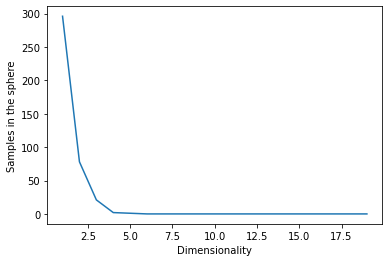

In [33]:
plt.plot(D_range,samples_in_sphere_list)
plt.xlabel("Dimensionality")
plt.ylabel("Samples in the sphere")

We can see that, when th dimension gets bigger, the number of samples tends to 0.

**Concentration of angles** (slides 20-22)

Draw vectors from a D-dimensional space, what is their expected angle?

In [34]:
def generate_points(D):
  X = np.random.rand(D)
  Y = np.random.rand(D)
  Z = np.random.rand(D)
  W = np.random.rand(D)
  return X, Y, Z, W

def compute_cos(a, b):
  dot_prod = np.dot(a,b)
  norm_a = np.linalg.norm(a)
  norm_b = np.linalg.norm(b)
  cos = dot_prod / (norm_a*norm_b)
  return cos

First, verify how cos of the angle between two random vectors. For defining two vectors we sample 4 random points.

$$a = X - Y$$
$$b = W - Z$$

In [35]:
N = 100
means_cos = []
D_range=range(5,1000)
for D in D_range:
  sum_cos = 0
  for _ in range(N):
    X, Y, Z, W = generate_points(D)
    cos = compute_cos(X-Y,Z-W)
    sum_cos += cos
  mean_cos = sum_cos/N
  means_cos.append(mean_cos)

Text(0, 0.5, 'cos')

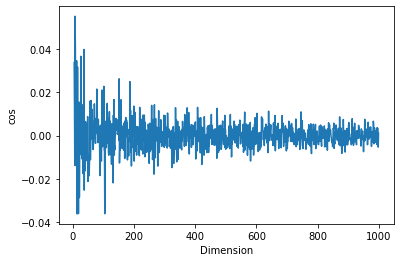

In [36]:
plt.plot(D_range, means_cos)
plt.xlabel("Dimension")
plt.ylabel("cos")

As seen in the slides, the value of cos(teta) tends to 0 when the dimension gets bigger.




Now, verify the angle between vectors which form a triangle $X, Y, Z$.

In [37]:
N = 100
means_cos = []
D_range=range(5,1000)
for D in D_range:
  sum_cos = 0
  for _ in range(N):
    X, Y, Z, _ = generate_points(D)
    cos = compute_cos(X-Y,Z-Y)
    sum_cos += cos
  mean_cos = sum_cos/N
  means_cos.append(mean_cos)

Text(0, 0.5, 'cos')

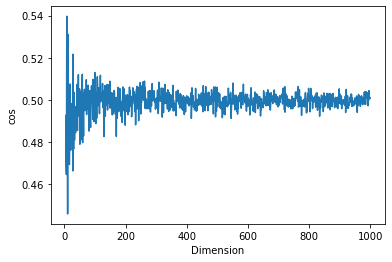

In [38]:
plt.plot(D_range, means_cos)
plt.xlabel("Dimension")
plt.ylabel("cos")

Same results as in the slides, when the dimension gets bigger, the value of cos(teta) tends to 1/2.